# Programmieraufgabe: Implementierung des Newton-Verfahrens

### Teil 1: Grundlegende Implementierung
Implementieren Sie das Newton-Verfahren in Julia. 

In [1]:
f(x) = -26 + 85 * x - 91 * x^2 + 44 * x^3 - 8 * x^4 + x^5
df(x) = 85 - 182 * x + 132 * x^2 - 32 * x^3 + 5 * x^4

df (generic function with 1 method)

In [ ]:
# Part 1: Basic implementation of Newton's method
function newton(f, df, x0, tol, max_iter)
    # f: Function whose root we want to find
    # df: Derivative of f
    # x0: Initial guess
    # tol: Tolerance (stopping criterion)
    # max_iter: Maximum number of iterations

    x = x0
    iter = 0
    x_values = [x]  # Store iteration values for visualization

    while abs(f(x)) > tol && iter < max_iter
        # Check for division by zero
        if df(x) == 0
            error("Derivative is zero at x = $x. Cannot continue.")
        end

        # Newton iteration
        x = x - f(x) / df(x)
        push!(x_values, x)  # Store for visualization
        iter += 1
    end

    # Check if we found a solution within tolerance
    if abs(f(x)) > tol
        @warn "Newton's method did not converge within $max_iter iterations."
    end

    return x, iter, x_values
end

newton (generic function with 1 method)

In [3]:
x = newton(f, df, 1.0, 0.0001, 1000)
println("x = ", x)

x = (0.5570255161323902, 5, [1.0, 0.375, 0.5159194399600385, 0.5545080566547139, 0.557015604236721, 0.5570255161323902])


In [4]:
x = newton(f, df, 0.0, 0.0001, 1000)
println("x = ", x)

x = (0.5570255051379259, 5, [0.0, 0.3058823529411765, 0.4853190940239955, 0.5496617287634946, 0.5569412135377882, 0.5570255051379259])


In [5]:
x = newton(f, df, 5.0, 0.0001, 1000)
println("x = ", x)

x = (0.5570255157731352, 10, [5.0, 3.9068750000000003, 2.9968194172519835, 2.2774066125543753, 1.72766052390229, 1.2684010520439337, 0.7193102766389161, 0.5090228763893254, 0.5536227154224381, 0.5570074263119684, 0.5570255157731352])


### Teil 2: Automatische Differentiation 
Erweitern Eure Implementierung, um die manuelle Eingabe der Ableitung überflüssig zu machen. Verwenden Sie dazu das Package `TaylorSeries` in Julia, um die Ableitung automatisch zu berechnen.

In [10]:
import Pkg
Pkg.add("TaylorSeries")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed TaylorSeries ─ v0.19.1
    Updating `~/.julia/environments/v1.10/Project.toml`
  [6aa5eb33] + TaylorSeries v0.19.1
    Updating `~/.julia/environments/v1.10/Manifest.toml`
  [6aa5eb33] + TaylorSeries v0.19.1
Precompiling project...
  ✓ LogExpFunctions
  ✓ GeoInterface
  ✓ OpenSSL
  ✓ LogExpFunctions → LogExpFunctionsChainRulesCoreExt
  ✓ TaylorSeries
  ✓ TaylorSeries → TaylorSeriesSAExt
  ✓ SpecialFunctions
  ✓ HTTP
  ✓ GeometryBasics
  ✓ WebSockets
  ✓ SpecialFunctions → SpecialFunctionsChainRulesCoreExt
  ✓ MechanismGeometries
  ✓ ForwardDiff
  ✓ ForwardDiff → ForwardDiffStaticArraysExt
  ✓ MeshCat
  ✓ MeshCatMechanisms
  ✓ ReverseDiff
  17 dependencies successfully precompiled in 15 seconds. 137 already precompiled.
  1 dependency had output during precompilation:
┌ MeshCat
│  [ Info: Listening on: 127.0.0.1:8700, thread id: 1
│  ┌ Info: MeshCat server started. You can open the 

In [11]:
using TaylorSeries

In [12]:
function newton_auto(f, x0, tol, max_iter)
    # f: Function whose root we want to find
    # x0: Initial guess
    # tol: Tolerance (stopping criterion)
    # max_iter: Maximum number of iterations

    x = x0
    iter = 0
    x_values = [x]  # Store iteration values for visualization

    while abs(f(x)) > tol && iter < max_iter
        # Compute derivative using TaylorSeries
        t = Taylor1([x, 1.0])  # Create Taylor series at current point
        ft = f(t)  # Evaluate function on Taylor series
        df_x = ft[1]  # Coefficient of first-order term is the derivative

        # Check for division by zero
        if df_x == 0
            error("Derivative is zero at x = $x. Cannot continue.")
        end

        # Newton iteration
        x = x - f(x) / df_x
        push!(x_values, x)  # Store for visualization
        iter += 1
    end

    # Check if we found a solution within tolerance
    if abs(f(x)) > tol
        @warn "Newton's method did not converge within $max_iter iterations."
    end

    return x, iter, x_values
end

newton_auto (generic function with 1 method)

In [13]:
x = newton_auto(f, 1.0, 0.0001, 1000)
println("x = ", x)

x = (0.5570255161323902, 5, [1.0, 0.375, 0.5159194399600385, 0.5545080566547139, 0.557015604236721, 0.5570255161323902])


### Teil 3: Analyse und Tests

1. Testen Eure Implementierung an folgenden Funktionen:
   - f₁(x) = x² - 4.5             (Nullstellen in der nähe von x = ±2)
   - f₂(x) = sin(x) + 0.5x        (Nullstellen in der nähe von x = π/(2))
   - f₃(x) = exp(x) - 2.5         (Nullstelle in der nähe von x = 1.4)
   - f₄(x) = x³ - 2x² + x - 3     (Findet ihr eine Nullstelle?)

2. Visualisiert die Funktionen und die Iterationsschritte des Newton-Verfahrens.
   - Die Funktion selbst
   - Findet eine möglichkeit die Iterationsschritte des Newton-Verfahrens zu visualisieren

   _**Hinweis**_: 
    
    _Ändert hierfür eure `newton_auto` Funktion so ab, dass die x-Werte der Iterationsschritte mitausgegeben werden._

3. Untersucht das Konvergenzverhalten:
   - Wie hängt die Anzahl der benötigten Iterationen vom Startwert ab?
   - Gibt es Startwerte, bei denen das Verfahren nicht konvergiert?
   - Vergleichen Sie die Effizienz mit dem Bisektionsverfahren (z.B. über die Anzahl der Iterationen)

In [19]:
f_1(x) = x^2 - 4.5
f_2(x) = sin(x) + 0.5x
f_3(x) = exp(x) - 2.5
f_4(x) = x^3 - 2x^2 + x - 3

f_4 (generic function with 1 method)

In [32]:
x = newton_auto(f_4, 1.4, 0.0001, 1000)
println("x = ", x)

x = (2.174559419770096, 6, [1.4, 3.568750000000001, 2.7446064480802406, 2.3203945023801538, 2.187570557719695, 2.1746760021003193, 2.174559419770096])


In [36]:
function visualize_newton(f, x_values, title_str)
    # Define the range for the plot based on x values
    x_min = minimum(x_values) - 1
    x_max = maximum(x_values) + 1
    x_range = range(x_min, x_max, length=1000)

    # Plot the function
    p = plot(x_range, f.(x_range), label="f(x)", linewidth=2, title=title_str)
    plot!(p, x_range, zeros(length(x_range)), label="y=0", color=:black, linestyle=:dash)

    # Add markers for each Newton iteration
    for i in 1:length(x_values)-1
        x = x_values[i]
        next_x = x_values[i+1]

        # Plot the current point
        scatter!(p, [x], [f(x)], label=i == 1 ? "Iterations" : "", color=:red, markersize=5)

        # Plot the tangent line at the current point
        if i < length(x_values)
            # Compute derivative using Taylor series
            t = Taylor1([x, 1.0])
            ft = f(t)
            df_x = ft[1]

            # Tangent line: y = f(x) + f'(x)(t - x)
            tangent(t) = f(x) + df_x * (t - x)
            plot!(p, [x, next_x], [f(x), 0], color=:green, linestyle=:dot, label=i == 1 ? "Tangent lines" : "")
        end
    end

    # Add the final approximation
    scatter!(p, [x_values[end]], [f(x_values[end])], color=:blue, markersize=6, label="Final approximation")

    return p
end

visualize_newton (generic function with 1 method)

In [ ]:
import Pkg;
Pkg.add("Plots");

In [40]:
using Plots

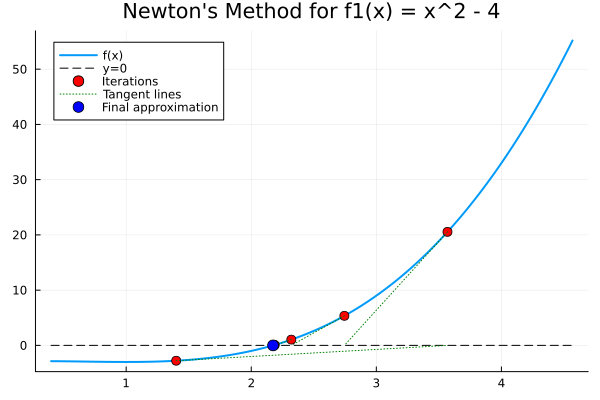

f1(x) = x^2 - 4: Root = 2.174559419770096 found after 6 iterations, f(root) = 6.148646880532738e-8


In [42]:
x0 = 1.4  # Starting point
root, iterations, x_values = newton_auto(f_4, x0, 0.0001, 1000)
println("f1(x) = x^2 - 4: Root = $root found after $iterations iterations, f(root) = $(f_4(root))")
p1 = visualize_newton(f_4, x_values, "Newton's Method for f1(x) = x^2 - 4")
display(p1)
